In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

In [10]:
for i in range(1,151):
    print(f"python benchmark_partition.py --npl {i} --npo {i}")

python benchmark_partition.py --npl 1 --npo 1
python benchmark_partition.py --npl 2 --npo 2
python benchmark_partition.py --npl 3 --npo 3
python benchmark_partition.py --npl 4 --npo 4
python benchmark_partition.py --npl 5 --npo 5
python benchmark_partition.py --npl 6 --npo 6
python benchmark_partition.py --npl 7 --npo 7
python benchmark_partition.py --npl 8 --npo 8
python benchmark_partition.py --npl 9 --npo 9
python benchmark_partition.py --npl 10 --npo 10
python benchmark_partition.py --npl 11 --npo 11
python benchmark_partition.py --npl 12 --npo 12
python benchmark_partition.py --npl 13 --npo 13
python benchmark_partition.py --npl 14 --npo 14
python benchmark_partition.py --npl 15 --npo 15
python benchmark_partition.py --npl 16 --npo 16
python benchmark_partition.py --npl 17 --npo 17
python benchmark_partition.py --npl 18 --npo 18
python benchmark_partition.py --npl 19 --npo 19
python benchmark_partition.py --npl 20 --npo 20
python benchmark_partition.py --npl 21 --npo 21
python ben

In [3]:
dask_noindex = pd.read_csv("dask_npartition_result5.csv")
# dask_noindex["compute_t"][dask_noindex.compute_t > 50] = 50
# dask_noindex = dask_noindex[dask_noindex.order_len > 0]
# dask_noindex["total_len"] = dask_noindex["lineitem_len"]+dask_noindex["order_len"]
dask_noindex.head()

,pl,po,st,mt
0,1,1,0.001241,0.846356
1,1,3,0.001255,0.808584
2,1,5,0.001268,0.805470
3,1,7,0.001278,0.813802
4,1,9,0.001287,0.808581


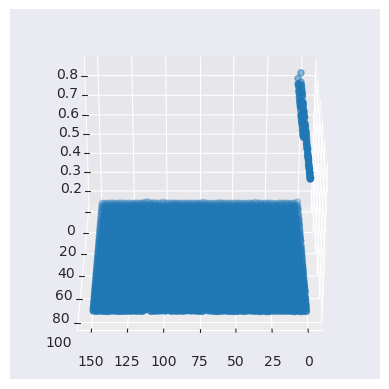

In [4]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

ax.scatter(dask_noindex["pl"] , dask_noindex["po"] , dask_noindex["mt"])

ax.view_init(azim=90, elev=30)

plt.show()

In [5]:
#sub = dask_noindex[dask_noindex.order_len == 130]
sns.scatterplot(dask_noindex["pl"],dask_noindex["po"],hue = dask_noindex["mt"],estimator=np.mean)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

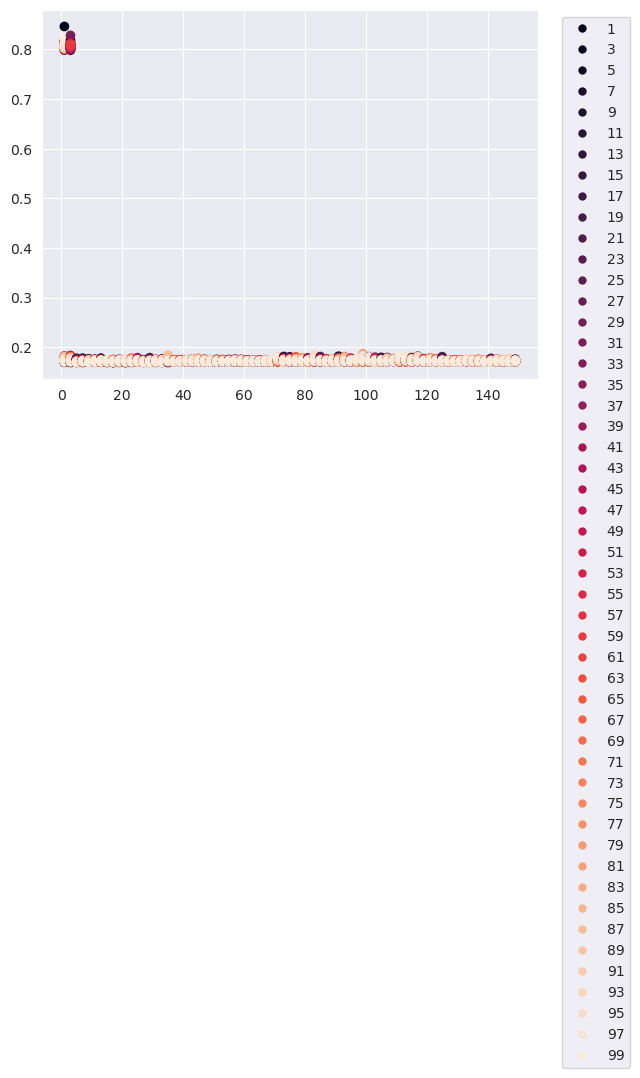

In [9]:
sc = plt.scatter(dask_noindex["pl"],dask_noindex["mt"],c=dask_noindex["po"])
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(dask_noindex["po"])]
plt.legend(handles=handles,bbox_to_anchor=(1.2, 1))
plt.show()

/Users/muhuaxu/opt/anaconda3/envs/fintech/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='npartition'>

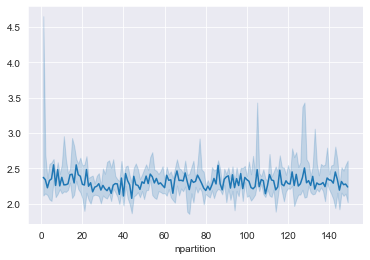

In [80]:
partition = pd.read_csv("dask_npartition_result4.csv")
sns.lineplot(partition["npartition"],partition["computet"]+partition["setupt"],estimator=np.median)

In [82]:
len(partition)/150

9.933333333333334

In [72]:
pandas = pd.read_csv("pandas_result.csv")
pandas["total_t"]=pandas[["loadl","indexl","loado","indexo","merget"]].sum(axis=1)
pandas.head()

,ln,on,loadl,indexl,loado,indexo,mergel,merget,sizeo,sizel,total_t
0,10,10,4.222752,1.930074,3.061171,0.063199,1000000,5.226887,433750524,628605564,14.504081
1,10,20,4.222752,1.930074,5.013483,0.111552,1000000,3.331458,867462362,628605564,14.609319
2,10,30,4.222752,1.930074,8.324978,0.486815,1000000,2.118968,1267345068,628605564,17.083587
3,10,40,4.222752,1.930074,9.585598,1.997340,1000000,2.611057,1734875950,628605564,20.346821
4,10,50,4.222752,1.930074,13.726307,1.928434,1000000,2.439102,2134800467,628605564,24.246669


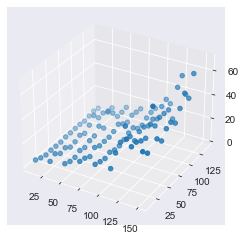

In [74]:
# Create the figure
fig = plt.figure()

# Add an axes
ax = fig.add_subplot(111,projection='3d')

ax.scatter(pandas["ln"] , pandas["on"] , pandas["merget"])

#ax.view_init(azim=90, elev=30)

plt.show()

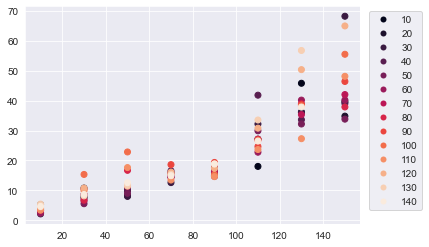

In [75]:
sc = plt.scatter(pandas["ln"],pandas["merget"],c=pandas["on"])
lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)), mec="none",
                        label="{:g}".format(i), ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(pandas["on"])]
plt.legend(handles=handles,bbox_to_anchor=(1.2, 1))
plt.show()

/Users/muhuaxu/opt/anaconda3/envs/fintech/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


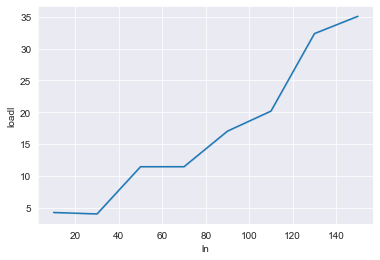

/Users/muhuaxu/opt/anaconda3/envs/fintech/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


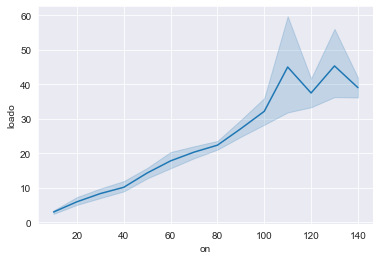

In [77]:
sns.lineplot(pandas["ln"],pandas["loadl"],estimator=np.mean)
plt.show()
sns.lineplot(pandas["on"],pandas["loado"],estimator=np.mean)
plt.show()

/Users/muhuaxu/opt/anaconda3/envs/fintech/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


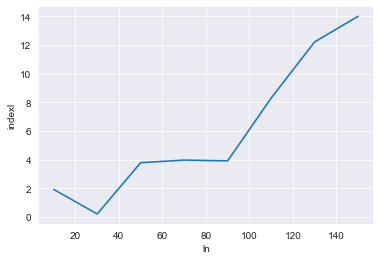

/Users/muhuaxu/opt/anaconda3/envs/fintech/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


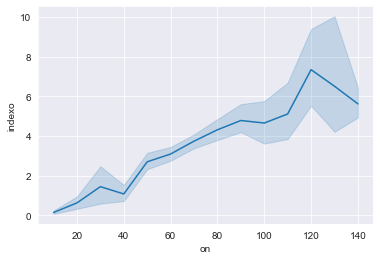

In [78]:
sns.lineplot(pandas["ln"],pandas["indexl"],estimator=np.mean)
plt.show()
sns.lineplot(pandas["on"],pandas["indexo"],estimator=np.mean)
plt.show()